# Homework 4 - Graph Neural Networks

In this homework we will implement graph representation, graph classification, neighborhood sampling and graph attention components. This homework is based on the Chapter 13 from the book [https://udlbook.github.io/udlbook/](https://udlbook.github.io/udlbook/)

## Part 1 - Graph Representation (10 points)

This notebook investigates representing graphs with matrices as illustrated in figure 13.4 from the book.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

Below we present two approaches to creating a Graph() object using the networkx package. In the first approach we use the adjaceny matrix to create the graph.

In [2]:
# Routine to draw graph structure
def draw_graph_structure(adjacency_matrix):
  G = nx.Graph()
  n_node = adjacency_matrix.shape[0]
  for i in range(n_node):
    for j in range(i):
      if adjacency_matrix[i,j]:
          G.add_edge(i,j)

  nx.draw(G, nx.spring_layout(G, seed = 0), with_labels=True)
  print(G.nodes())
  plt.show()

[[0 1 0 1 0 0 0 0]
 [1 0 1 1 1 0 0 0]
 [0 1 0 0 1 0 0 0]
 [1 1 0 0 1 0 0 0]
 [0 1 1 1 0 1 0 1]
 [0 0 0 0 1 0 1 1]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 1 1 0 0]]
[1, 0, 2, 3, 4, 5, 6, 7]


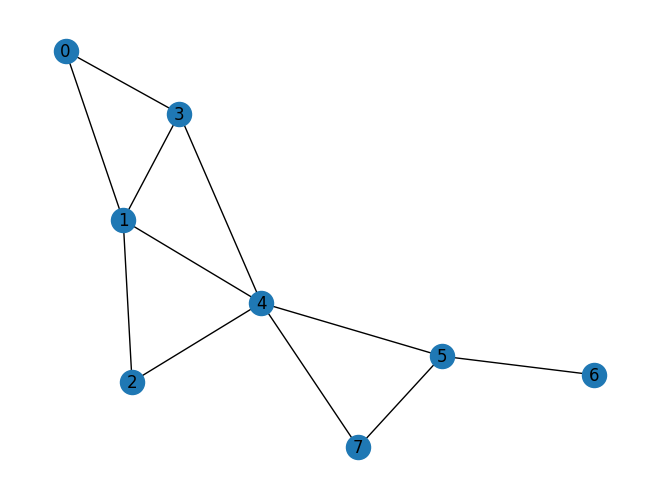

In [3]:
# Define an adjacency matrix
A = np.array(
    [[0,1,0,1,0,0,0,0],
     [1,0,1,1,1,0,0,0],
     [0,1,0,0,1,0,0,0],
     [1,1,0,0,1,0,0,0],
     [0,1,1,1,0,1,0,1],
     [0,0,0,0,1,0,1,1],
     [0,0,0,0,0,1,0,0],
     [0,0,0,0,1,1,0,0]]);
print(A)
draw_graph_structure(A)
# Note that the nodes are labelled from 0 rather than 1 as in the book

In the second approach we add nodes and edges explicitly.

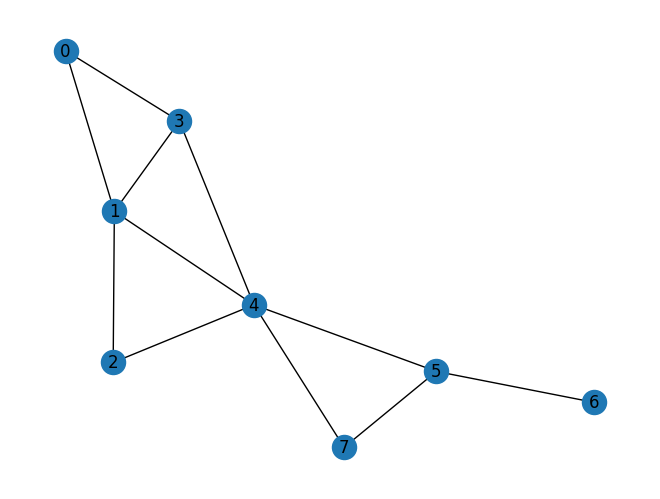

['0', '1', '2', '3', '4', '5', '6', '7']
[[0 1 0 1 0 0 0 0]
 [1 0 1 1 1 0 0 0]
 [0 1 0 0 1 0 0 0]
 [1 1 0 0 1 0 0 0]
 [0 1 1 1 0 1 0 1]
 [0 0 0 0 1 0 1 1]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 1 1 0 0]]


In [4]:
#Add nodes and edges explicitly
G = nx.Graph()
G.add_nodes_from(['0', '1', '2', '3', '4', '5', '6', '7'])
G.add_edge('0','1')
G.add_edge('1','2')
G.add_edge('0','3')
G.add_edge('1','3')
G.add_edge('1','4')
G.add_edge('2','4')
G.add_edge('3','4')
G.add_edge('4','5')
G.add_edge('5','6')
G.add_edge('4','7')
G.add_edge('5','7')
nx.draw(G, nx.spring_layout(G, seed = 0), with_labels=True)
plt.show()

print(G.nodes())
A = nx.adjacency_matrix(G, G.nodes()).toarray()
print(A)


In [5]:
# 5 points
# TODO -- find algorithmically how many walks of length 4 are between nodes 5 and 6
A4 = np.linalg.matrix_power(A, 4)
num_walks_5_6 = A4[5, 6]
print("Number of  walks of length 4 between nodes 5 and 6 =",num_walks_5_6)

# 5 points
# TODO: Find algorithmically how many paths of length 4 are there between node 6 and every other node
walks_from_6 = A4[6, :].reshape(1, -1)
x = np.zeros((A.shape[0],1))
x[0] = 1
print("Number of paths of length 4 from node 6 to every other node \n",walks_from_6 )

Number of  walks of length 4 between nodes 5 and 6 = 2
Number of paths of length 4 from node 6 to every other node 
 [[2 3 2 2 7 2 3 4]]


## Part 2 - Graph Classification - 20 points

Let's build the components of a model that maps a chemical structure to a binary decision. This model might be used to predict whether a chemical is liquid at room temperature or not. We'll start by drawing the chemical structure for [1-Butanol](https://en.wikipedia.org/wiki/1-Butanol#/media/File:Butan-1-ol_Lewis.svg).

In [6]:
# Define a graph that represents the chemical structure of 1-Butanol and draw it.
# Each node can be labelled with the node number and the element, for example, '0:H', '3:C', '1:H', '13:O' etc.
#TODO: Create the 1-Butanol graph and plot it

G = nx.Graph()

# Add nodes with labels
G.add_node(0, element='C')
G.add_node(1, element='C')
G.add_node(2, element='C')
G.add_node(3, element='C')
G.add_node(4, element='O')

# Add edges along the chain
G.add_edge(0, 1)
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(3, 4)

# Show the structure
print("Nodes:", G.nodes(data=True))
print("Edges:", G.edges())

Nodes: [(0, {'element': 'C'}), (1, {'element': 'C'}), (2, {'element': 'C'}), (3, {'element': 'C'}), (4, {'element': 'O'})]
Edges: [(0, 1), (1, 2), (2, 3), (3, 4)]


Adjacency matrix A:
[[0 1 0 0 0 1 1 1 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 1 1 1 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0 0 1 1 0 0]
 [0 0 1 0 1 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]]
Top 15 rows of X:
[[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 

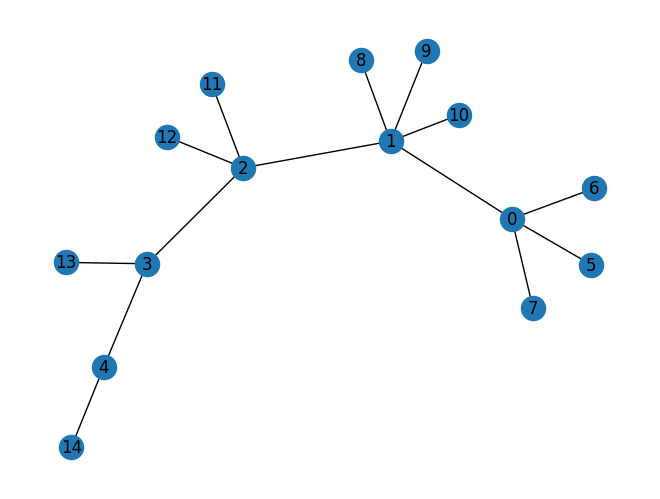

In [7]:
# 5 points
# Adjacency matrix for 1-Butanol
# TODO -- Display the adjacency matrix for this chemical
# Replace this line
# Adjacency matrix for 1-Butanol (C4H10O) with 15 atoms

A = np.zeros((15,15), dtype=int)

# Heavy-atom chain
A[0,1] = A[1,0] = 1
A[1,2] = A[2,1] = 1
A[2,3] = A[3,2] = 1
A[3,4] = A[4,3] = 1

# Hydrogens on Carbon 0
A[0,5] = A[5,0] = 1
A[0,6] = A[6,0] = 1
A[0,7] = A[7,0] = 1

# Hydrogens on Carbon 1
A[1,8]  = A[8,1]  = 1
A[1,9]  = A[9,1]  = 1
A[1,10] = A[10,1] = 1

# Hydrogens on Carbon 2
A[2,11] = A[11,2] = 1
A[2,12] = A[12,2] = 1

# Hydrogen on Carbon 3
A[3,13] = A[13,3] = 1

# Hydrogen on Oxygen (–OH group)
A[4,14] = A[14,4] = 1

print("Adjacency matrix A:")
print(A)

## NOTE: The Adjacency Matrix will change based on the order of the nodes.

# TODO -- Define node matrix X
# There will be 15 nodes and 118 possible chemical elements
# so we'll define a 118x15 matrix.  Each column represents one
# node and is a one-hot vector (i.e. all zeros, except a single one at the
# chemical number of the element).
# Chemical numbers:  Hydrogen-->1, Carbon-->6,  Oxygen-->8
# Since the indices start at 0, we'll set element 0 to 1 for hydrogen, element 5
# to one for carbon, and element 7 to one for oxygen
# Replace this line:
# Node feature matrix X : 118 x 15
X = np.zeros((118, 15), dtype=int)

# Atom ordering (matches adjacency matrix)
atom_types = [
    'C','C','C','C','O',   # nodes 0–4
    'H','H','H',           # nodes 5–7
    'H','H','H',           # nodes 8–10
    'H','H',               # nodes 11–12
    'H',                   # node 13
    'H'                    # node 14 (O–H hydrogen)
]

for i, atom in enumerate(atom_types):
    if atom == 'H':
        X[0, i] = 1    # index 0 for Hydrogen
    elif atom == 'C':
        X[5, i] = 1    # index 5 for Carbon
    elif atom == 'O':
        X[7, i] = 1    # index 7 for Oxygen

print("Top 15 rows of X:")
print(X[:15])
draw_graph_structure(A)

Now let's define a network with four layers that maps this graph to a binary value, using the formulation in equation 13.11.

In [8]:
# We'll need these helper functions

# Define the Rectified Linear Unit (ReLU) function
def ReLU(preactivation):
  activation = preactivation.clip(0.0)
  return activation

# Define the logistic sigmoid function
def sigmoid(x):
  return 1.0/(1.0+np.exp(-x))

In [9]:
# Our network will have K=3 hidden layers, and will use a dimension of D=200.
K = 3; D = 200
# Set seed so we always get the same random numbers
np.random.seed(1)
# Let's initialize the parameter matrices randomly with Kaiming He initialization
Omega0 = np.random.normal(size=(D, 118)) * 2.0 / D
beta0 = np.random.normal(size=(D,1)) * 2.0 / D
Omega1 = np.random.normal(size=(D, D)) * 2.0 / D
beta1 = np.random.normal(size=(D,1)) * 2.0 / D
Omega2 = np.random.normal(size=(D, D)) * 2.0 / D
beta2 = np.random.normal(size=(D,1)) * 2.0 / D
omega3 = np.random.normal(size=(1, D))
beta3 = np.random.normal(size=(1,1))

In [10]:
def graph_neural_network(A, X, Omega0, beta0, Omega1, beta1, Omega2, beta2, omega3, beta3):
    # TODO Define this network according to equation 13.11 from the book
    # We will use ReLU as the nonlinear activation for the hidden layers
    # We will use sigmoid activation for the last layer
    # Replace this line

    H1 = ReLU(Omega0 @ (X @ A) + beta0)
    H2 = ReLU(Omega1 @ (H1 @ A) + beta1)
    H3 = ReLU(Omega2 @ (H2 @ A) + beta2)
    f = sigmoid(omega3 @ (H3 @ A) + beta3)

    return f

In [11]:
# 10 points
# Let's test this network
f = graph_neural_network(A,X, Omega0, beta0, Omega1, beta1, Omega2, beta2, omega3, beta3)
print("Your value is %3f: "%(f[0,0]))

Your value is 0.334967: 


In [12]:
# 5 points
# Let's check that permuting the indices of the graph doesn't change
# the output of the network
# Define a permutation matrix
P = np.eye(A.shape[0])
np.random.shuffle(P)
print(P)

# TODO -- Use the Permutation matrix P to permute the adjacency matrix A and node matrix X
# Replace these lines using Eq. 13.1
A_permuted = P @ A @ P.T
X_permuted = X @ P.T

f2 = graph_neural_network(A_permuted,X_permuted, Omega0, beta0, Omega1, beta1, Omega2, beta2, omega3, beta3)
print("After permutation value is %3f: "%(f2[0,0]), "Before permutation value is %3f: "%(f[0,0]))

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
After permutation value is 0.343215:  Before permutation value is 0.334967: 


## Part 3 - Neighborhood Sampling - 40 points
In this section we will investigate neighborhood sampling of graphs as in figure 13.10 from the book.

Let's construct the graph from figure 13.10, which has 23 nodes.

In [13]:
# Define adjacency matrix
# DO NOT change this matrix
A = np.array([[0,1,1,1,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0],
              [1,0,1,0,0, 0,0,0,1,1, 0,0,0,0,0, 0,0,0,0,0, 0,0,0],
              [1,1,0,1,0, 0,0,0,0,1, 0,0,0,0,0, 0,0,0,0,0, 0,0,0],
              [1,0,1,0,1, 0,1,1,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0],
              [0,0,0,1,0, 1,0,1,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0],
              [0,0,0,0,1, 0,0,1,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0],
              [0,0,0,1,0, 0,0,1,0,1, 1,0,0,0,0, 0,0,0,0,0, 0,0,0],
              [0,0,0,1,1, 1,1,0,0,0, 1,0,0,1,0, 0,0,0,0,0, 0,0,0],
              [0,1,0,0,0, 0,0,0,0,1, 0,0,0,0,0, 0,0,0,0,0, 0,0,0],
              [0,1,1,0,0, 0,1,0,1,0, 0,1,1,0,0, 0,1,0,0,0, 0,0,0],
              [0,0,0,0,0, 0,1,1,0,0, 0,0,1,0,0, 0,0,0,0,0, 0,0,0],
              [0,0,0,0,0, 0,0,0,0,1, 0,0,0,0,1, 1,1,0,0,0, 0,0,0],
              [0,0,0,0,0, 0,0,0,0,1, 1,0,0,1,0, 0,1,1,0,0, 0,0,0],
              [0,0,0,0,0, 0,0,1,0,0, 0,0,1,0,0, 0,0,1,1,0, 0,0,0],
              [0,0,0,0,0, 0,0,0,0,0, 0,1,0,0,0, 1,0,0,0,1, 0,0,0],
              [0,0,0,0,0, 0,0,0,0,0, 0,1,0,0,1, 0,1,0,0,1, 0,0,0],
              [0,0,0,0,0, 0,0,0,0,1, 0,1,1,0,0, 1,0,1,0,1, 0,0,0],
              [0,0,0,0,0, 0,0,0,0,0, 0,0,1,1,0, 0,1,0,1,0, 1,1,1],
              [0,0,0,0,0, 0,0,0,0,0, 0,0,0,1,0, 0,0,1,0,0, 0,0,1],
              [0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,1, 1,1,0,0,0, 1,0,0],
              [0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,1,0,1, 0,1,0],
              [0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,1,0,0, 1,0,1],
              [0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,1,1,0, 0,1,0]]);
print(A)

[[0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 

In [14]:
# Routine to draw graph structure, highlighting original node (brown in fig 13.10)
# and neighborhood nodes (orange in figure 13.10)
def draw_graph_structure(adjacency_matrix, original_node, neighborhood_nodes=None):

  G = nx.Graph()
  n_node = adjacency_matrix.shape[0]
  for i in range(n_node):
    for j in range(i):
      if adjacency_matrix[i,j]:
          G.add_edge(i,j)

  color_map = []

  for node in G:
    if original_node[node]:
      color_map.append('brown')
    else:
      if neighborhood_nodes[node]:
        color_map.append('orange')
      else:
        color_map.append('white')

  nx.draw(G, nx.spring_layout(G, seed = 7), with_labels=True,node_color=color_map)
  plt.show()

Output layer:


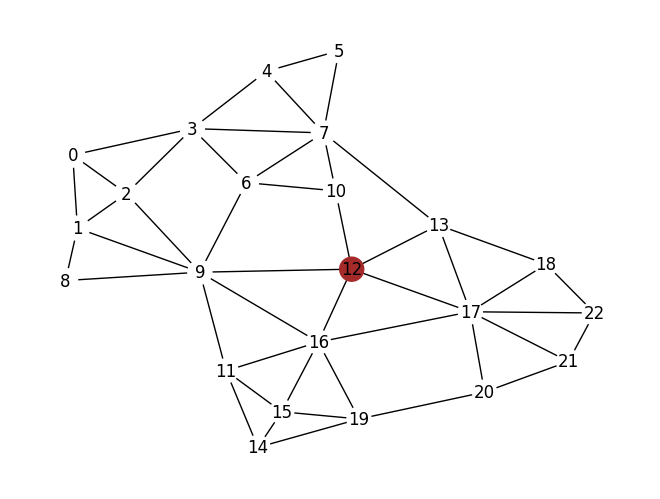

In [15]:
n_nodes = A.shape[0]

# Define a single output layer node
output_layer_nodes=np.zeros((n_nodes,1)); output_layer_nodes[12]=1
# Define the neighboring nodes to draw (none)
neighbor_nodes = np.zeros((n_nodes,1))
print("Output layer:")
draw_graph_structure(A, output_layer_nodes, neighbor_nodes)

Let's imagine that we want to form a batch for a node labelling task that consists of just node 12 in the output layer (highlighted). The network consists of the input, hidden layer 1, hidden layer2, and the output layer.

Hidden layer 2:


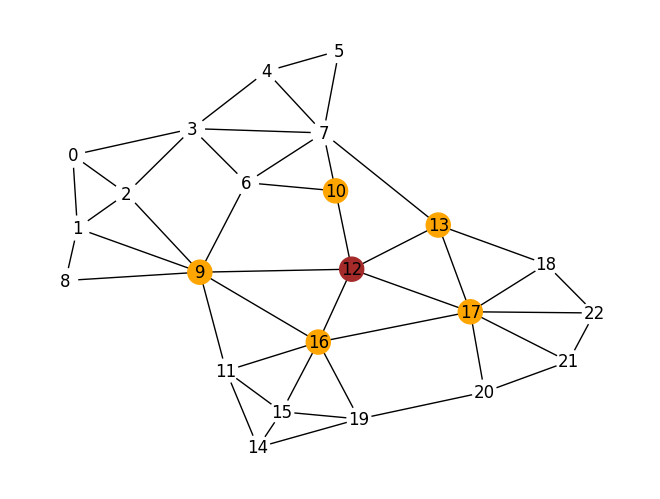

In [16]:
# 4 points
# TODO Find the nodes in hidden layer 2 that connect to node 12 in the output layer
# using the adjacency matrix
# Replace this line:
hidden_layer2_nodes = A[:,12].reshape(-1,1)

print("Hidden layer 2:")
draw_graph_structure(A, output_layer_nodes, hidden_layer2_nodes)

Hidden layer 1:


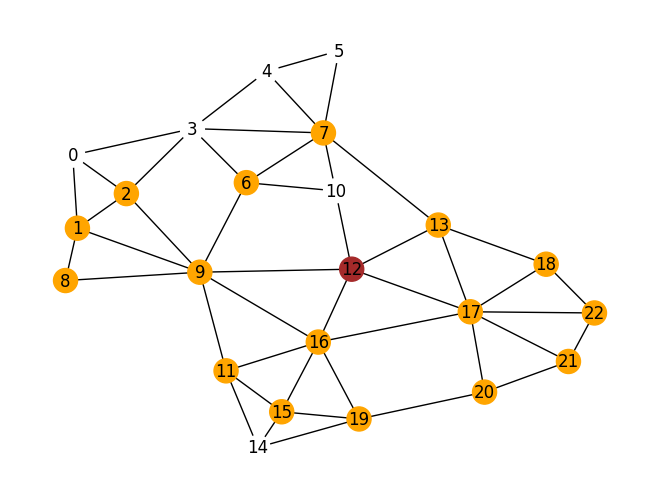

In [17]:
# 3 points
# TODO - Find the nodes in hidden layer 1 that connect that connect to node 12 in the output layer
# using the adjacency matrix
# Replace this line:
hidden_layer1_nodes = (A @ hidden_layer2_nodes > 0).astype(int);

print("Hidden layer 1:")
draw_graph_structure(A, output_layer_nodes, hidden_layer1_nodes)

Input layer:


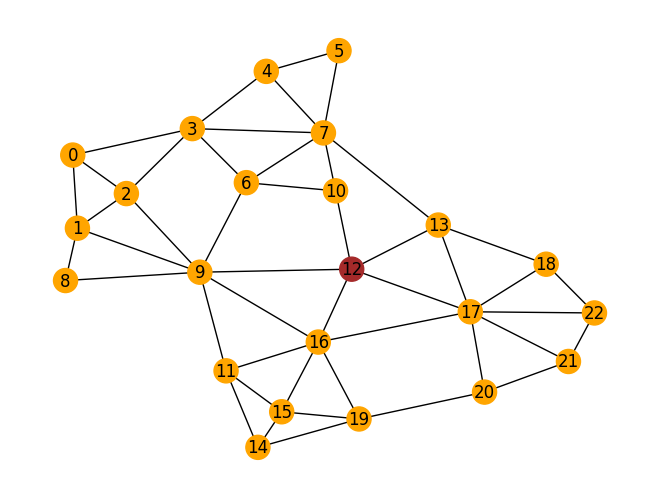

In [18]:
# 3 points
# TODO Find the nodes in the input layer that connect to node 12 in the output layer
# using the adjacency matrix
# Replace this line:
input_layer_nodes = (A @ hidden_layer1_nodes > 0).astype(int);

print("Input layer:")
draw_graph_structure(A, output_layer_nodes, input_layer_nodes)

This is bad news. This is a fairly sparsely connected graph (i.e. adjacency matrix is mostly zeros) and there are only two hidden layers. Nonetheless, we have to involve almost all the nodes in the graph to compute the loss at this output.

To resolve this problem, we'll use neighborhood sampling. We'll start again with a single node in the output layer.

Output layer:


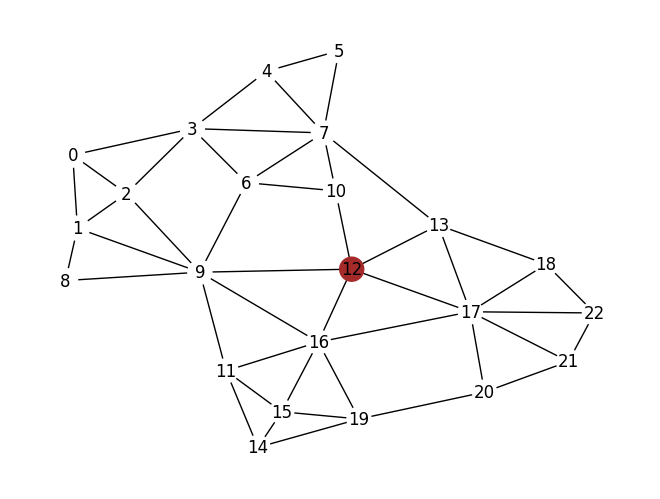

In [19]:
print("Output layer:")
draw_graph_structure(A, output_layer_nodes, neighbor_nodes)

In [20]:
# Define number of neighbors to sample
n_sample = 3

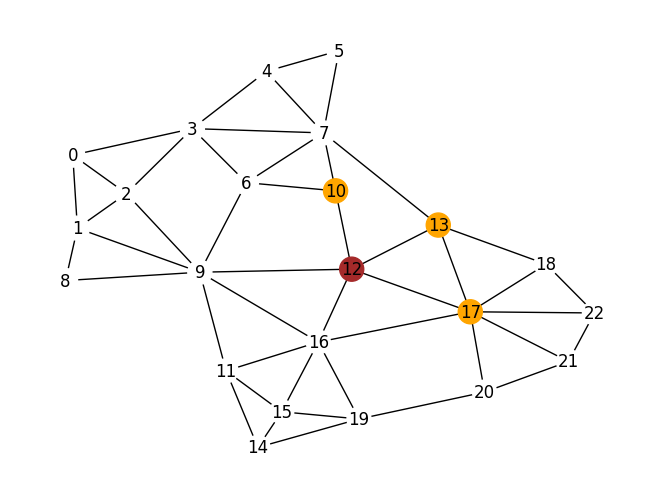

In [21]:
# 10 points
# TODO Find the nodes in hidden layer 2 that connect to node 12 in the output layer
# using the adjacency matrix.  Then sample n_sample of these nodes randomly without
# replacement.

neighbors = np.where(A[:,12] == 1)[0]
sampled_h2 = np.random.choice(neighbors, size=n_sample, replace=False)

hidden_layer2_nodes = np.zeros((n_nodes,1));
hidden_layer2_nodes[sampled_h2] = 1

draw_graph_structure(A, output_layer_nodes, hidden_layer2_nodes)

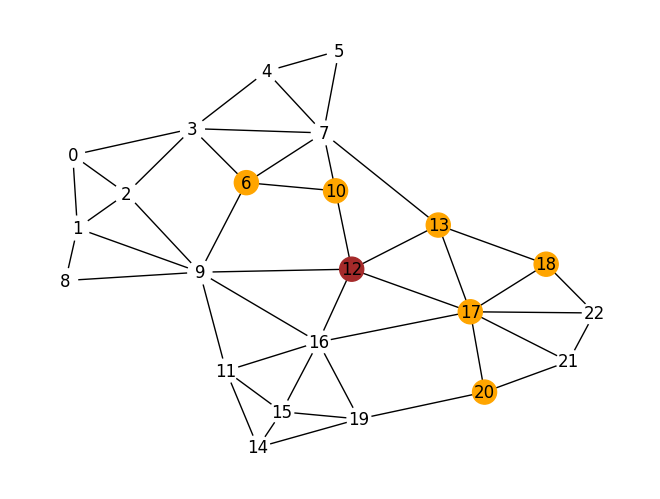

In [22]:
# 10 points
# TODO Find the nodes in hidden layer 1 that connect to the nodes in hidden layer 2
# using the adjacency matrix.  Then sample n_sample of these nodes randomly without
# replacement.  Make sure not to sample nodes that were already included in hidden layer 2, or the output layer.
# The nodes at hidden layer 1 are the union of these nodes and the nodes in hidden layer 2

# Replace this line:
neighbors_h1 = np.where(np.sum(A[:, sampled_h2], axis=1) > 0)[0]
exclude = set([12]) | set(sampled_h2)
neighbors_h1 = np.array([n for n in neighbors_h1 if n not in exclude])

sampled_h1 = np.random.choice(neighbors_h1, size=n_sample, replace=False)

hidden_layer1_nodes = np.zeros((n_nodes,1))
hidden_layer1_nodes[sampled_h1, 0] = 1
hidden_layer1_nodes[sampled_h2, 0] = 1

draw_graph_structure(A, output_layer_nodes, hidden_layer1_nodes)

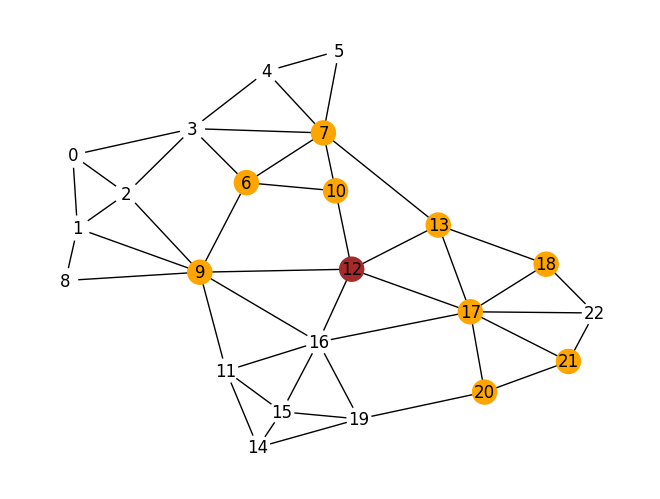

In [23]:
# 10 points
# TODO Find the nodes in the input layer that connect to the nodes in hidden layer 1
# using the adjacency matrix.  Then sample n_sample of these nodes randomly without
# replacement.  Make sure not to sample nodes that were already included in hidden layer 1,2, or the output layer.
# The nodes at the input layer are the union of these nodes and the nodes in hidden layers 1 and 2

neighbors_input = set()
for node in sampled_h1:
    neighbors_input.update(np.where(A[:, node] == 1)[0].tolist())

# Remove nodes already used (output, H1, H2)
used_so_far = set([12]) | set(sampled_h1) | set(sampled_h2)
neighbors_input = list(neighbors_input - used_so_far)

# Sample input layer neighbors
sampled_input = np.random.choice(neighbors_input, size=n_sample, replace=False)

# Build indicator vector
input_layer_nodes = np.zeros((n_nodes,1))
input_layer_nodes[sampled_input] = 1
input_layer_nodes[sampled_h1] = 1
input_layer_nodes[sampled_h2] = 1

draw_graph_structure(A, output_layer_nodes, input_layer_nodes)


If you did this correctly, there should be 9 yellow nodes in the figure. The "receptive field" of node 12 in the output layer increases much more slowly as we move back through the layers of the network.

## Part 4 - Graph Attention Network - 30 points

In this part we will build a graph attention mechanism from scratch, as discussed in section 13.8.6 of the book and illustrated in figure 13.12c

The self-attention mechanism maps $N$ inputs $\mathbf{x}_{n}\in\mathbb{R}^{D}$ and returns $N$ outputs $\mathbf{x}'_{n}\in \mathbb{R}^{D}$.  

In [24]:
# Set seed so we get the same random numbers
np.random.seed(1)
# Number of nodes in the graph
N = 9
# Number of dimensions of each input
D = 5

# Define a graph
A = np.array([[0,1,0,1,0,0,0,0,1],
              [1,0,1,1,1,0,0,0,0],
              [0,1,0,0,1,0,0,0,1],
              [1,1,0,0,1,0,0,0,0],
              [0,1,1,1,0,1,0,1,1],
              [0,0,0,0,1,0,1,1,0],
              [0,0,0,0,0,1,0,0,0],
              [0,0,0,0,1,1,0,0,0],
              [1,0,1,0,1,0,0,0,1]]);
print(A)

# Let's also define some random data
X = np.random.normal(size=(D,N))

[[0 1 0 1 0 0 0 0 1]
 [1 0 1 1 1 0 0 0 0]
 [0 1 0 0 1 0 0 0 1]
 [1 1 0 0 1 0 0 0 0]
 [0 1 1 1 0 1 0 1 1]
 [0 0 0 0 1 0 1 1 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 0 1 1 0 0 0]
 [1 0 1 0 1 0 0 0 1]]


We need parameters for the graph attention layer. See Equation 13.22 - 13.24

In [25]:
# Choose random values for the parameters
omega = np.random.normal(size=(D,D))
beta = np.random.normal(size=(D,1))
phi = np.random.normal(size=(2*D,1))

We'll need a softmax operation that operates on the columns of the matrix and a ReLU function as well

In [26]:
# Define softmax operation that works independently on each column
# NOTE: The Softmax is along the columns
def softmax_cols(data_in):
  # Exponentiate all of the values
  exp_values = np.exp(data_in) ;
  # Sum over columns
  denom = np.sum(exp_values, axis = 0);
  # Replicate denominator to N rows
  denom = np.matmul(np.ones((data_in.shape[0],1)), denom[np.newaxis,:])
  # Compute softmax
  softmax = exp_values / denom
  # return the answer
  return softmax


# Define the Rectified Linear Unit (ReLU) function
def ReLU(preactivation):
  activation = preactivation.clip(0.0)
  return activation

In [27]:
# 30 points
# Now let's compute self attention in matrix form
def graph_attention(X,omega, beta, phi, A):

  # TODO -- Write this function (see figure 13.12c)
  # 1. Compute X_prime
  X_prime = omega @ X + beta

  # 2. Compute S
  left = np.repeat(X_prime, N, axis=1)
  right = np.tile(X_prime, (1, N))
  concat = np.vstack([left, right])

  S = (phi.T @ concat).reshape(N, N)

  # 3. To apply the mask, set S to a very large negative number (e.g. -1e20) everywhere where A+I is zero
  mask = (A + np.eye(N)) == 0
  S[mask] = -1e20

  # 4. Run the softmax function to compute the attention values
  Alpha = softmax_cols(S)

  # 5. Postmultiply X' by the attention values
  H = X_prime @ Alpha

  # 6. Apply the ReLU function
  output = ReLU(H)

  return output;

In [28]:
# Test out the graph attention mechanism
np.set_printoptions(precision=3)
output = graph_attention(X, omega, beta, phi, A);
print("Correct answer is:")
print("[[0.    0.    0.    0.    0.    0.    0.    0.    0.   ]")
print(" [0.341 0.326 0.    0.322 0.    0.    0.    0.    0.497]")
print(" [0.    0.    0.679 0.    0.66  0.331 0.    0.439 0.   ]")
print(" [0.    0.    1.428 0.    1.703 0.073 0.    1.312 0.   ]")
print(" [0.    0.    0.36  0.    0.569 0.12  0.162 0.615 0.   ]]")


print("Your answer is:")
print(output)

Correct answer is:
[[0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.341 0.326 0.    0.322 0.    0.    0.    0.    0.497]
 [0.    0.    0.679 0.    0.66  0.331 0.    0.439 0.   ]
 [0.    0.    1.428 0.    1.703 0.073 0.    1.312 0.   ]
 [0.    0.    0.36  0.    0.569 0.12  0.162 0.615 0.   ]]
Your answer is:
[[0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.348 0.326 0.    0.324 0.    0.    0.    0.    0.497]
 [0.    0.    0.759 0.    0.659 0.331 0.    0.439 0.   ]
 [0.    0.    1.537 0.    1.697 0.073 0.    1.312 0.   ]
 [0.    0.    0.573 0.    0.58  0.12  0.162 0.615 0.   ]]
